## Лабораторная работа № 1 - Работа с библиотекой pandas в Python. Упражнения (часть 2)

In [139]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [140]:
data = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [141]:
# your code here
c = data.isnull().sum()
print(c)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [142]:
# your code here
discrete = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']
continuous = ['BMI', 'DiabetesPedigreeFunction']

с = data.copy()
с[discrete] = с[discrete].fillna(с[discrete].median())
с[continuous] = с[continuous].fillna(с[continuous].mean())
print(с)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Class  
0                       0.627   50      1  
1                      

__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [143]:
# your code here
stats = data.describe()
print(stats)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age       Class  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  

__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [144]:
# your code here
c = data[(data['Age'] > 50) & (data['Class'] == 1)].shape[0]
print(c)

38


__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [145]:
# your code here
w = data.nlargest(3, 'Pregnancies')
print(w)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
159           17    163.0           72.0           41.0    114.0  40.9   
88            15    136.0           70.0           32.0    110.0  37.1   
298           14    100.0           78.0           25.0    184.0  36.6   

     DiabetesPedigreeFunction  Age  Class  
159                     0.817   47      1  
88                      0.153   43      1  
298                     0.412   46      1  


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [146]:
# your code here
c = data[(data['Age'].between(30,40)) & (data['Pregnancies'] >= 3)].shape[0]
print(c)

142


__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [147]:
# your code here
normal = data['BloodPressure'].between(80, 89)
pNormal = normal.mean() * 100
print(f"{pNormal:.2f}%")

18.88%


__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения.
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [148]:
# your code here
highBMI = data['BMI'] >= 30
avg = data['BloodPressure'].mean()
BMIandPressure = data[highBMI & (data['BloodPressure'] > avg)]
count = BMIandPressure.shape[0]
print(count)

248


__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет.

In [149]:
# Glucose ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
avgD = data[(data['Class'] == 1)]['Glucose'].mean()
avgNoD = data[(data['Class'] == 0)]['Glucose'].mean()
print(avgD, avgNoD)

142.31954887218046 110.64386317907444


In [150]:
# BloodPressure ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
avgD = data[(data['Class'] == 1)]['BloodPressure'].mean()
avgNoD = data[(data['Class'] == 0)]['BloodPressure'].mean()
print(avgD, avgNoD)

75.32142857142857 70.87733887733887


In [151]:
# Insulin ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
avgD = data[(data['Class'] == 1)]['Insulin'].mean()
avgNoD = data[(data['Class'] == 0)]['Insulin'].mean()
print(avgD, avgNoD)

206.84615384615384 130.28787878787878


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

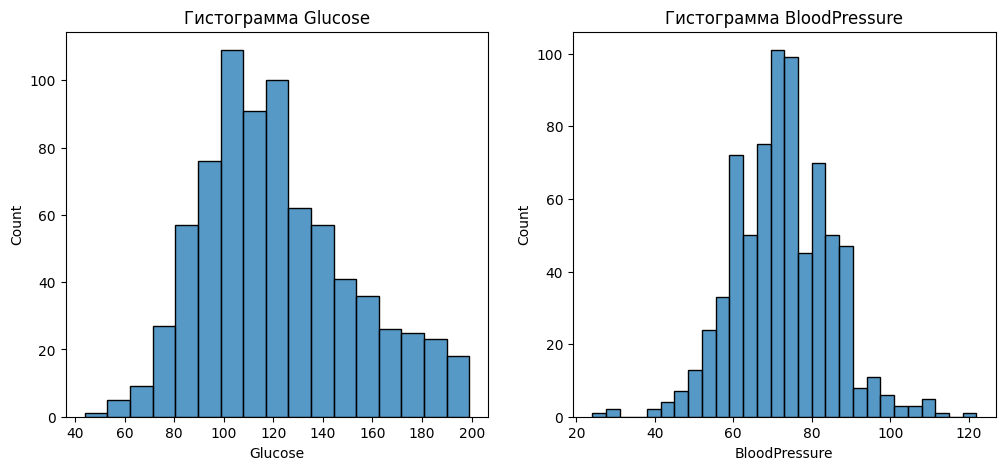

In [152]:
# your code here
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data['Glucose'], kde=False)
plt.title('Гистограмма Glucose')
plt.subplot(1,2,2)
sns.histplot(data['BloodPressure'], kde=False)
plt.title('Гистограмма BloodPressure')
plt.show()

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

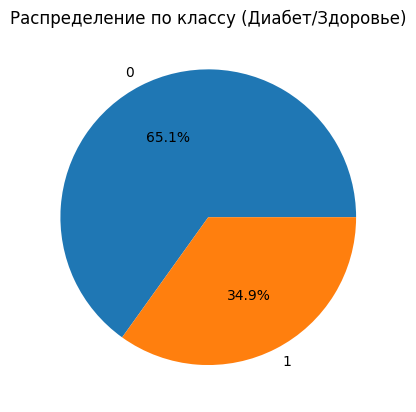

In [153]:
# your code here
data['Class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Распределение по классу (Диабет/Здоровье)')
plt.ylabel('')
plt.show()

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным.

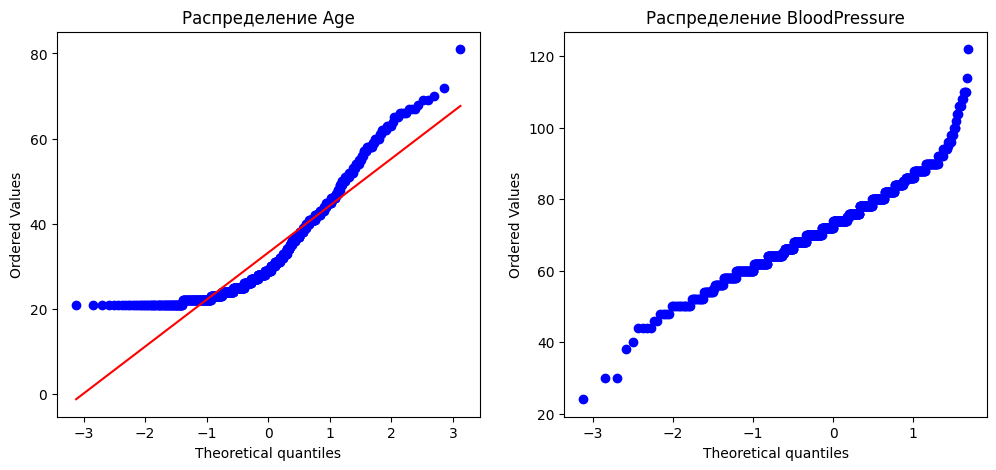

In [154]:
# your code here
import scipy.stats as stats

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(data['Age'], dist="norm", plot=axes[0])
axes[0].set_title('Распределение Age')

stats.probplot(data['BloodPressure'], dist="norm", plot=axes[1])
axes[1].set_title('Распределение BloodPressure')

plt.show()

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

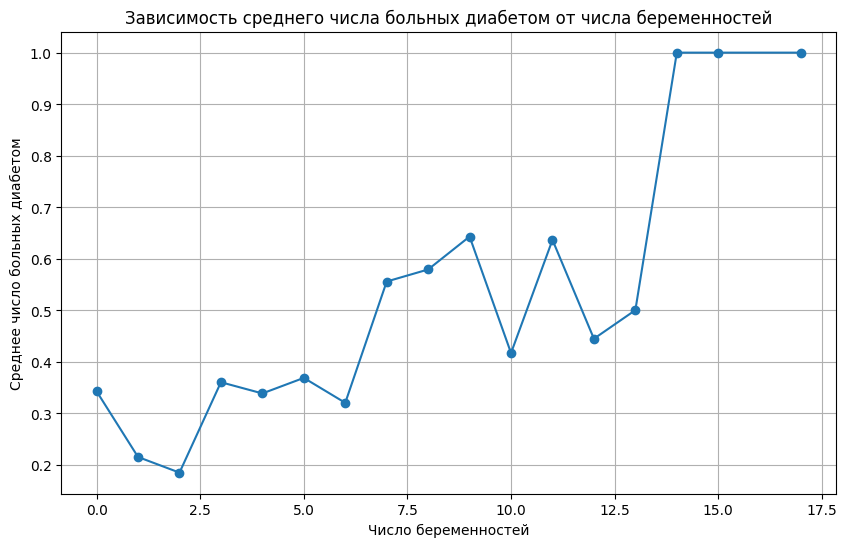

In [155]:
# your code here

# Расчет среднего числа больных диабетом для каждой категории числа беременностей
mean_diabetes_by_pregnancies = data.groupby('Pregnancies')['Class'].mean()

plt.figure(figsize=(10,6))
mean_diabetes_by_pregnancies.plot(kind='line', marker='o')
plt.xlabel('Число беременностей')
plt.ylabel('Среднее число больных диабетом')
plt.title('Зависимость среднего числа больных диабетом от числа беременностей')
plt.grid(True)
plt.show()

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [156]:
# your code here
data['wasPregnant'] = (data['Pregnancies'] > 0).astype(int)

__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [157]:
# your code here
wasPregnant = round(data[data['wasPregnant'] == 1]['Class'].mean() * 100, 2)
notPregnant = round(data[data['wasPregnant'] == 0]['Class'].mean() * 100, 2)
print(wasPregnant, notPregnant)

35.01 34.23


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__

Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [158]:
# your code here
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi <= 24.9:
        return 'Normal weight'
    elif bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

data['bodyType'] = data['BMI'].apply(categorize_bmi)

__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [159]:
# your code here
healthy = (data['bodyType'] == 'Normal weight') & (data['BloodPressure'].between(80, 89))
healthyD = healthy & (data['Class'] == 1)
percentHealthyD = round(healthyD.mean() * 100, 2)
print(percentHealthyD)

0.13
